In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# 1. Muat Data Pertumbuhan Anak
growth_data = pd.read_csv('data_gizi_anak.csv')

# 2. Persiapan Data
X = np.array(growth_data['Usia (Tahun)']).reshape(-1, 1)
y_height = np.array(growth_data['Tinggi Badan (cm)'])
y_weight = np.array(growth_data['Berat Badan (kg)'])

# Split data menjadi train dan test
X_train, X_test, y_train_height, y_test_height = train_test_split(X, y_height, test_size=0.2, random_state=42)
X_train, X_test, y_train_weight, y_test_weight = train_test_split(X, y_weight, test_size=0.2, random_state=42)

# Reshape data untuk LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, 1))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, 1))

# 3. Model untuk Tinggi Badan
model_height = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 1)),
    Dense(1)
])
model_height.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 4. Pelatihan Model Tinggi Badan
early_stopping = EarlyStopping(monitor='loss', patience=10)
history_height = model_height.fit(X_train_lstm, y_train_height, epochs=100, validation_split=0.2,
                                   callbacks=[early_stopping], verbose=1)

# 5. Evaluasi Model Tinggi Badan
loss_height, mae_height = model_height.evaluate(X_test_lstm, y_test_height)
print(f"Model Tinggi Badan - Loss: {loss_height:.2f}, MAE: {mae_height:.2f}")

# 6. Model untuk Berat Badan
model_weight = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 1)),
    Dense(1)
])
model_weight.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 7. Pelatihan Model Berat Badan
history_weight = model_weight.fit(X_train_lstm, y_train_weight, epochs=100, validation_split=0.2,
                                   callbacks=[early_stopping], verbose=1)

# 8. Evaluasi Model Berat Badan
loss_weight, mae_weight = model_weight.evaluate(X_test_lstm, y_test_weight)
print(f"Model Berat Badan - Loss: {loss_weight:.2f}, MAE: {mae_weight:.2f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 15338.8750 - mae: 121.5234 - val_loss: 15626.1016 - val_mae: 122.8022
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15224.4590 - mae: 120.7357 - val_loss: 15607.5762 - val_mae: 122.7284
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15686.8291 - mae: 122.9421 - val_loss: 15589.2949 - val_mae: 122.6554
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15547.0410 - mae: 122.2555 - val_loss: 15571.4238 - val_mae: 122.5841
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14938.3203 - mae: 119.8020 - val_loss: 15553.4648 - val_mae: 122.5124
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15060.1748 - mae: 120.4510 - val_loss: 15535.4160 - val_mae: 122.4402
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15098.4785 - mae: 120.4806 - val_loss: 15517.1152 - val_mae: 122.3670
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15170.4756 - mae: 120.9258 - val_loss: 15498.3848 - val_m

### **Penjelasan Kode secara Detail**

Berikut adalah penjelasan langkah-langkah kode untuk membangun model prediksi tinggi badan dan berat badan anak menggunakan **TensorFlow** dan **LSTM**.

---

### **1. Impor Pustaka yang Diperlukan**
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
```

#### **Penjelasan:**
- **`pandas` dan `numpy`:** Digunakan untuk manipulasi data dan operasi numerik.
- **`train_test_split`:** Untuk membagi data menjadi bagian training dan validation.
- **`Sequential`, `Dense`, `LSTM`:** Membangun model neural network berbasis LSTM.
- **`EarlyStopping`:** Untuk menghentikan pelatihan model secara otomatis ketika performa pada data validasi tidak membaik.
- **`MinMaxScaler`:** Untuk normalisasi data ke rentang 0–1 agar model lebih stabil.

---

### **2. Membaca Dataset Gizi Anak**
```python
growth_data = pd.read_csv('data_gizi_anak.csv')
```

#### **Penjelasan:**
- **Dataset:** File CSV berisi data anak, seperti usia, kebutuhan kalori, tinggi badan, dan berat badan.

---

### **3. Menentukan Fitur Input dan Target**
```python
X = np.array(growth_data[['Usia (Tahun)', 'Kebutuhan Kalori (kcal)']])
y_height = np.array(growth_data['Tinggi Badan (cm)'])
y_weight = np.array(growth_data['Berat Badan (kg)'])
```

#### **Penjelasan:**
- **Input (`X`):** Menggunakan usia dan kebutuhan kalori sebagai variabel input.
- **Target:**
  - **`y_height`:** Prediksi tinggi badan anak.
  - **`y_weight`:** Prediksi berat badan anak.

---

### **4. Normalisasi Data**
```python
scaler_X = MinMaxScaler()
scaler_y_height = MinMaxScaler()
scaler_y_weight = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_height_scaled = scaler_y_height.fit_transform(y_height.reshape(-1, 1))
y_weight_scaled = scaler_y_weight.fit_transform(y_weight.reshape(-1, 1))
```

#### **Penjelasan:**
- **`MinMaxScaler`:** Mengubah nilai data ke rentang 0–1 untuk mempercepat pelatihan dan mencegah model overfitting.
- **`fit_transform`:** Melakukan fitting scaler ke data sekaligus mengaplikasikan transformasi.
- **`reshape`:** Mengubah data target menjadi array 2D yang sesuai untuk model.

---

### **5. Membagi Data menjadi Training dan Validation**
```python
X_train, X_val, y_train_height, y_val_height = train_test_split(X_scaled, y_height_scaled, test_size=0.2, random_state=42)
_, _, y_train_weight, y_val_weight = train_test_split(X_scaled, y_weight_scaled, test_size=0.2, random_state=42)
```

#### **Penjelasan:**
- **`train_test_split`:** Membagi data menjadi:
  - **Training:** Digunakan untuk melatih model.
  - **Validation:** Digunakan untuk mengevaluasi performa model.
- **`test_size=0.2`:** Sebanyak 20% data digunakan untuk validasi.

---

### **6. Reshape Data untuk LSTM**
```python
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
```

#### **Penjelasan:**
- **Reshape:** Model LSTM membutuhkan data dalam bentuk 3 dimensi: `(samples, timesteps, features)`.
  - **`samples`:** Jumlah sampel.
  - **`timesteps`:** 1 (karena data tidak bersifat sekuensial dalam waktu).
  - **`features`:** 2 (usia dan kebutuhan kalori).

---

### **7. Membangun Model LSTM**
```python
model_height = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])
model_height.compile(optimizer='adam', loss='mse')
```

#### **Penjelasan:**
- **Lapisan LSTM:**
  - **50 units:** Jumlah unit di lapisan LSTM.
  - **`relu`:** Fungsi aktivasi untuk menangani non-linearitas.
  - **`input_shape`:** Bentuk input data: `(1 timestep, 2 features)`.
- **Lapisan Dense:**
  - **1 unit:** Output berupa prediksi tunggal (tinggi badan atau berat badan).
- **Kompilasi Model:**
  - **`optimizer='adam'`:** Optimizer yang adaptif dan cepat.
  - **`loss='mse'`:** Mean Squared Error digunakan sebagai fungsi loss.

---

### **8. Callback untuk Early Stopping**
```python
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
```

#### **Penjelasan:**
- **`monitor='val_loss'`:** Menghentikan pelatihan jika loss validasi tidak membaik.
- **`patience=10`:** Model berhenti setelah 10 epoch tanpa peningkatan performa.
- **`restore_best_weights=True`:** Mengembalikan bobot terbaik dari epoch sebelumnya.

---

### **9. Pelatihan Model**
```python
history_height = model_height.fit(
    X_train_lstm, y_train_height,
    validation_data=(X_val_lstm, y_val_height),
    epochs=200,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)
```

#### **Penjelasan:**
- **`fit`:** Melatih model dengan data training dan validasi.
- **`epochs=200`:** Maksimum iterasi pelatihan adalah 200 epoch.
- **`batch_size=16`:** Data dibagi menjadi batch sebanyak 16 sampel per iterasi.

---

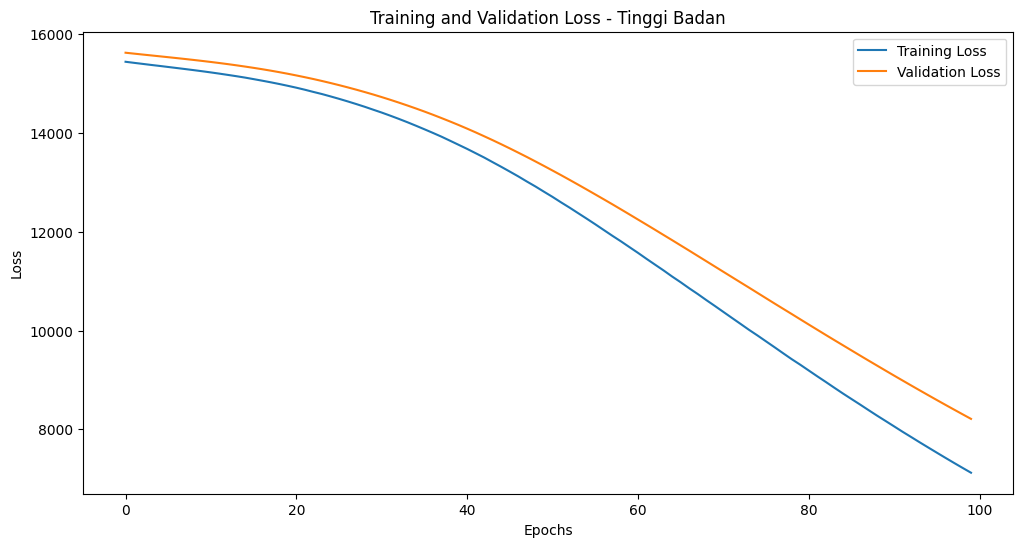

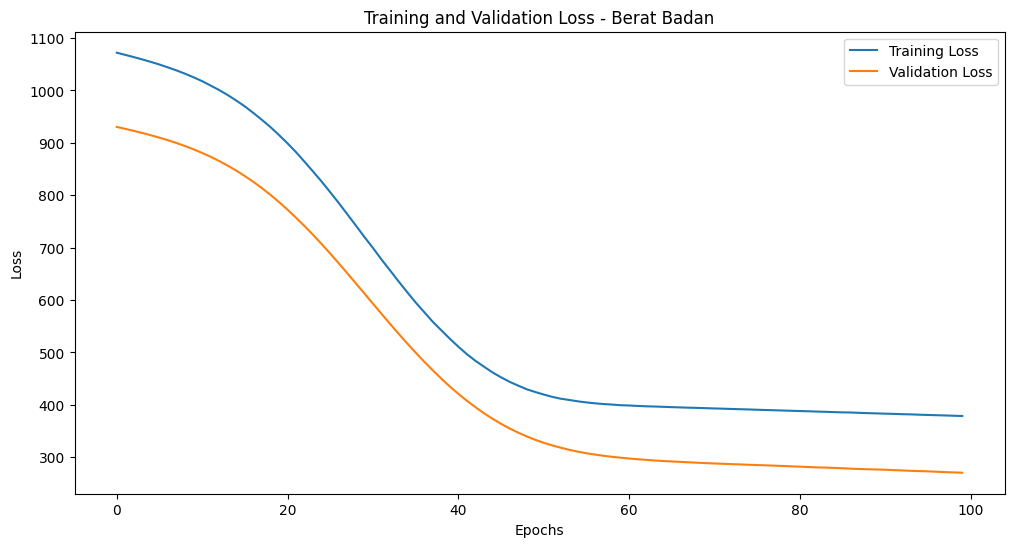

In [ ]:
import matplotlib.pyplot as plt

# Grafik Loss untuk Tinggi Badan
plt.figure(figsize=(12, 6))
plt.plot(history_height.history['loss'], label='Training Loss')
plt.plot(history_height.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Tinggi Badan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Grafik Loss untuk Berat Badan
plt.figure(figsize=(12, 6))
plt.plot(history_weight.history['loss'], label='Training Loss')
plt.plot(history_weight.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Berat Badan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




### **10. Prediksi dan Inverse Transform**
```python
predicted_height_val = model_height.predict(X_val_lstm)
predicted_height_val = scaler_y_height.inverse_transform(predicted_height_val)
```

#### **Penjelasan:**
- **Prediksi:** Model menghasilkan nilai prediksi untuk data validasi.
- **Inverse Transform:** Mengembalikan nilai prediksi ke skala asli (cm atau kg).

---

### **11. Visualisasi Performa Model**
```python
plt.figure(figsize=(10, 5))
plt.plot(history_height.history['loss'], label='Training Loss')
plt.plot(history_height.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Tinggi Badan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
```

#### **Penjelasan:**
- Menampilkan kurva loss untuk data training dan validasi agar dapat melihat performa model selama pelatihan.

---

### **Kesimpulan**
- **Model LSTM:** Digunakan untuk memprediksi tinggi dan berat badan berdasarkan usia dan konsumsi kalori.
- **Normalisasi:** Data dinormalisasi untuk meningkatkan performa model.
- **Validasi:** Data validasi memastikan model tidak overfitting.
- **Visualisasi:** Membantu memahami performa model selama pelatihan.

In [ ]:
# Prediksi Tinggi Badan pada Usia 4 Tahun
future_age = np.array([[4]])  # Usia 4 tahun
future_age_lstm = future_age.reshape((future_age.shape[0], 1, 1))
predicted_height = model_height.predict(future_age_lstm)
print(f"Prediksi Tinggi Badan pada Usia 4 Tahun: {predicted_height[0][0]:.2f} cm")

# Prediksi Berat Badan pada Usia 4 Tahun
predicted_weight = model_weight.predict(future_age_lstm)
print(f"Prediksi Berat Badan pada Usia 4 Tahun: {predicted_weight[0][0]:.2f} kg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Prediksi Tinggi Badan pada Usia 4 Tahun: 20.49 cm
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Prediksi Berat Badan pada Usia 4 Tahun: 10.19 kg


In [ ]:
z_score_data = pd.read_csv('z_score_data_who.csv')

def calculate_bmi(height_cm, weight_kg):
    """
    Menghitung Indeks Massa Tubuh (IMT).
    """
    height_m = height_cm / 100
    bmi = weight_kg / (height_m ** 2)
    return bmi

def analyze_z_score(bmi, age_years, gender, z_score_data):
    """
    Menghitung Z-Score menggunakan referensi data WHO.
    """
    ref = z_score_data[(z_score_data['Usia (Tahun)'] == age_years) & (z_score_data['Jenis Kelamin'] == gender)]
    if ref.empty:
        return None  # Tidak ada referensi
    mean_bmi = ref['Mean BMI'].values[0]
    sd_bmi = ref['SD BMI'].values[0]
    z_score = (bmi - mean_bmi) / sd_bmi
    return z_score

def classify_nutrition(z_score):
    """
    Mengklasifikasikan status gizi berdasarkan Z-Score.
    """
    if z_score < -2:
        return "Kurang Gizi"
    elif -2 <= z_score <= 2:
        return "Gizi Baik"
    else:
        return "Lebih Gizi"

def provide_recommendations(status):
    """
    Memberikan rekomendasi makanan berdasarkan status gizi.
    """
    if status == "Kurang Gizi":
        return "Tambahkan makanan padat kalori seperti susu tinggi protein, kacang-kacangan, atau alpukat."
    elif status == "Gizi Baik":
        return "Pertahankan pola makan seimbang dengan protein, sayuran, dan karbohidrat sehat."
    elif status == "Lebih Gizi":
        return "Kurangi gula dan lemak, serta tingkatkan asupan serat dari sayuran dan buah."
    return "Konsultasikan dengan ahli gizi."

food_data = pd.read_csv('indonesian_food_nutrition_data_200_items.csv')

def calculate_daily_intake(food_list):
    """
    Menghitung total kalori, protein, lemak, dan karbohidrat dari daftar makanan.
    """
    selected_food = food_data[food_data['Nama Makanan/Minuman'].isin(food_list)]
    total_nutrition = selected_food[['Kalori (kcal)', 'Protein (g)', 'Lemak (g)', 'Karbohidrat (g)']].sum()
    return total_nutrition

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

def pipeline(usia, jenis_kelamin, tinggi_badan, berat_badan, food_list):
    """
    Pipeline untuk analisis gizi dan prediksi pertumbuhan anak.
    """
    # 1. Hitung BMI dan Z-Score
    bmi = calculate_bmi(tinggi_badan, berat_badan)
    z_score = analyze_z_score(bmi, usia, jenis_kelamin, z_score_data)
    nutrition_status = classify_nutrition(z_score)

    # 2. Hitung konsumsi nutrisi harian
    daily_nutrition = calculate_daily_intake(food_list)

    # 3. Prediksi tinggi dan berat badan di masa depan
    future_age = np.array([[usia + 1]])  # Prediksi satu tahun ke depan
    future_age_lstm = future_age.reshape((future_age.shape[0], 1, 1))
    predicted_height = model_height.predict(future_age_lstm)[0][0]
    predicted_weight = model_weight.predict(future_age_lstm)[0][0]

    # 4. Berikan rekomendasi
    recommendation = provide_recommendations(nutrition_status)

    return {
        "BMI": bmi,
        "Z-Score": z_score,
        "Status Gizi": nutrition_status,
        "Prediksi Tinggi Badan": predicted_height,
        "Prediksi Berat Badan": predicted_weight,
        "Rekomendasi": recommendation,
        "Nutrisi Harian": daily_nutrition.to_dict()
    }

# Contoh penggunaan pipeline
usia = 3
jenis_kelamin = "Laki-laki"
tinggi_badan = 95
berat_badan = 15
food_list = ["Ayam Pop", "Tongseng", "Es Doger"]

result = pipeline(usia, jenis_kelamin, tinggi_badan, berat_badan, food_list)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
{'BMI': 16.62049861495845, 'Z-Score': -0.8530009233610324, 'Status Gizi': 'Gizi Baik', 'Prediksi Tinggi Badan': 20.486727, 'Prediksi Berat Badan': 10.194189, 'Rekomendasi': 'Pertahankan pola makan seimbang dengan protein, sayuran, dan karbohidrat sehat.', 'Nutrisi Harian': {'Kalori (kcal)': 1900.0, 'Protein (g)': 52.5, 'Lemak (g)': 25.5, 'Karbohidrat (g)': 155.0}}


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Model dengan Dropout
def build_model(units, dropout_rate, learning_rate):
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(1, 1)),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# Contoh Tuning Hyperparameter
units = [50, 100]
dropout_rates = [0.1, 0.3]
learning_rates = [0.001, 0.01]
best_model = None
best_loss = float('inf')

for unit in units:
    for dropout_rate in dropout_rates:
        for lr in learning_rates:
            model = build_model(unit, dropout_rate, lr)
            model.fit(X_train_lstm, y_train_height, epochs=50, validation_split=0.2, verbose=0)
            loss, _ = model.evaluate(X_test_lstm, y_test_height, verbose=0)
            if loss < best_loss:
                best_loss = loss
                best_model = model

print(f"Best Model Loss: {best_loss}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best Model Loss: 2598.424072265625


In [ ]:
# Simpan model untuk tinggi dan berat badan
model_height.save('model_height.h5')
model_weight.save('model_weight.h5')
